In [36]:
# ML libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

# define line width and font size of plots
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['font.size'] = 6.0
plt.rcParams['axes.titlesize'] = 6.0

In [33]:
# Preprocessing Definition
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [45]:
# Load Images and Preprocessing (Resize, Scale, Batch Size Definition)
img_size = 30
batch_size = 32

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (img_size, img_size),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary',
                                                 color_mode = 'rgb')
 
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (img_size, img_size),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            color_mode = 'rgb')

Found 25998 images belonging to 2 classes.
Found 1560 images belonging to 2 classes.


Shape is: (32, 30, 30, 3)


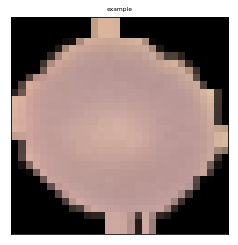

In [46]:
# Sanity Check
print('The shape is (batch size, height, width, channels):',training_set[0][0].shape)

# Pick and Plot a Random Example
fig, axa = plt.subplots(1, 1)
ax.set_title('example')
ax.imshow(training_set[0][0][0])
plt.xticks(())
plt.yticks(())
plt.savefig('example',dpi=900,transparent=True,orientation='landscape',bbox_inches='tight')
plt.savefig('example',dpi=900,transparent=True,orientation='landscape',bbox_inches='tight',format='pdf')

In [49]:
# Model Definition

training_set_size = 25998
test_set_size = 1560

model = keras.Sequential([
    keras.layers.Convolution2D(5,(3,3),input_shape=(img_size,img_size,training_set[0][0].shape[3]),padding='same',data_format='channels_last',activation='relu'),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Convolution2D(10,(3,3),padding='same',data_format='channels_last',activation='relu'),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Flatten(),
    #keras.layers.Dense(10, activation = 'relu'), # if you have a good CPU/GPU :S
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 5)         140       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 10)        460       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 10)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 640)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 641       
Total params: 1,241
Trainable params: 1,241
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Model Fitting
epochs = 5 # should lead to about 90% accuarcy

model.fit_generator(training_set,
                    steps_per_epoch = (training_set_size/batch_size),
                    epochs = epochs,
                    validation_data = test_set,
                    validation_steps = (test_set_size/batch_size))

Epoch 1/10
813/812 [==============================] - 162s 199ms/step - loss: 0.6102 - acc: 0.6696 - val_loss: 0.5731 - val_acc: 0.6641
Epoch 2/10
813/812 [==============================] - 149s 184ms/step - loss: 0.4816 - acc: 0.7797 - val_loss: 0.3443 - val_acc: 0.8346
Epoch 3/10
813/812 [==============================] - 151s 186ms/step - loss: 0.3643 - acc: 0.8455 - val_loss: 0.2405 - val_acc: 0.8910
Epoch 4/10
813/812 [==============================] - 155s 191ms/step - loss: 0.2866 - acc: 0.8861 - val_loss: 0.1806 - val_acc: 0.9340
Epoch 5/10
813/812 [==============================] - 144s 177ms/step - loss: 0.2409 - acc: 0.9101 - val_loss: 0.1723 - val_acc: 0.9327
Epoch 6/10
813/812 [==============================] - 147s 181ms/step - loss: 0.2167 - acc: 0.9222 - val_loss: 0.1418 - val_acc: 0.9545
Epoch 7/10
813/812 [==============================] - 149s 184ms/step - loss: 0.1988 - acc: 0.9304 - val_loss: 0.1385 - val_acc: 0.9487
Epoch 8/10
813/812 [============================